In [6]:
# Single game, 3 doors

import numpy as np

prize = ['goat', 'goat', 'car']

doors = np.random.choice(prize, 3, replace = False)
print('The prizes behind each door are: ')
print(doors)
print('   1\t  2\t 3\n')

first_choice = np.random.randint(0, 3)
print('The contestant chooses the door: ' + str(first_choice+1))

winning_door = np.where(doors=='car')[0][0]

while(True):
    open_door = np.random.randint(0, 3)
    if (open_door != winning_door and open_door != first_choice): break
print('The game host opens the door: ' + str(open_door+1))

conservator_door = first_choice

while(True): 
    switcher_door = np.random.randint(0, 3)
    if (switcher_door != first_choice and switcher_door != open_door): break
    
while(True):
    newcomer_door = np.random.randint(0, 3)
    if (newcomer_door != open_door): break
        
print('The conservator keeps his door: ' + str(conservator_door+1))
print('The switcher chooses the other door: ' + str(switcher_door+1))
print('The newcomer chooses a door: ' + str(newcomer_door+1) + '\n')

print('And the winner is...')
if(conservator_door == winning_door):
    print('\tConservator WINS!')
    print('\tSwitcher loses...')
else:
    print('\tConservator loses...')
    print('\tswitcher WINS!')
if(newcomer_door == winning_door):
    print('\tNewcomer WINS!')
else:
    print('\tNewcomer loses...')

The prizes behind each door are: 
['car' 'goat' 'goat']
   1	  2	 3

The contestant chooses the door: 1
The game host opens the door: 2
The conservator keeps his door: 1
The switcher chooses the other door: 3
The newcomer chooses a door: 1

And the winner is...
	Conservator WINS!
	Switcher loses...
	Newcomer WINS!


In [81]:
# N games, 3 doors

N = 100000

conservator_wins = 0
switcher_wins = 0
newcomer_wins = 0

for i in range(N):
    
    doors = np.random.choice(prize, 3, replace = False)
    
    first_choice = np.random.randint(0, 3)

    winning_door = np.where(doors=='car')[0][0]

    while(True):
        open_door = np.random.randint(0, 3)
        if (open_door != winning_door and open_door != first_choice): break
    
    conservator_door = first_choice

    while(True): 
        switcher_door = np.random.randint(0, 3)
        if (switcher_door != first_choice and switcher_door != open_door): break

    while(True):
        newcomer_door = np.random.randint(0, 3)
        if (newcomer_door != open_door): break

    if(conservator_door == winning_door):
        conservator_wins += 1
    else:
        switcher_wins += 1
        
    if(newcomer_door == winning_door):
        newcomer_wins += 1

print("Out of " + str(N) + " tries:")     
print("The conservator wins the car in " + str(round((conservator_wins*100/N), 1)) + "% of the tries")
print("The switcher wins the car in " + str(round((switcher_wins*100/N), 1)) + "% of the tries")
print("The newcomer wins the car in " + str(round((newcomer_wins*100/N), 1)) + "% of the tries")

Out of 100000 tries:
The conservator wins the car in 33.5% of the tries
The switcher wins the car in 66.5% of the tries
The newcomer wins the car in 49.9% of the tries


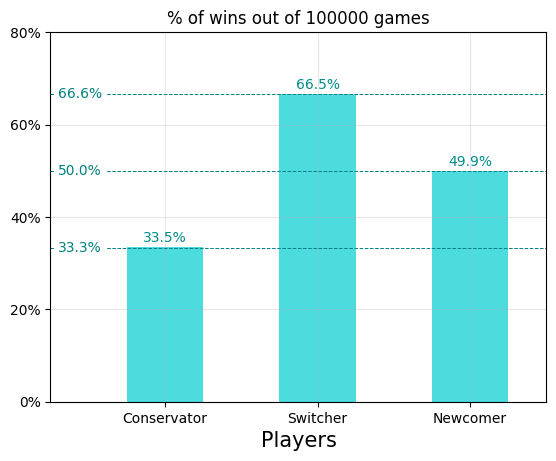

In [82]:
import matplotlib.pyplot as plt

players = np.array(["Conservator", "Switcher", "Newcomer"])
wins_percentage = np.array([conservator_wins*100/N, switcher_wins*100/N, newcomer_wins*100/N])

plt.bar(players, wins_percentage, width=0.5, color='darkturquoise', alpha=0.7)
plt.grid(alpha=0.3)
plt.yticks([0, 20, 40, 60, 80], ['0%', '20%', '40%', '60%', '80%'])
plt.title('% of wins out of ' + str(N) + ' games')
plt.xlabel('Players', fontsize=15)
plt.xlim(-0.75, len(players) - 0.5)

for i, value in enumerate(wins_percentage):
    plt.text(i, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', color='darkcyan')

plt.axhline(100/3, ls='dashed',c='teal', linewidth=0.7)
plt.annotate('33.3%', xy=(-0.75, 100/3), xytext=(-0.7, 100/3), verticalalignment='center', color='teal', bbox=dict(boxstyle='square', fc='white', edgecolor=(0, 0, 0, 0)))
plt.axhline(200/3, ls='dashed',c='teal', linewidth=0.7)
plt.annotate('66.6%', xy=(-0.75, 200/3), xytext=(-0.7, 200/3), verticalalignment='center', color='teal', bbox=dict(boxstyle='square', fc='white', edgecolor=(0, 0, 0, 0)))
plt.axhline(100/2, ls='dashed',c='teal', linewidth=0.7)
plt.annotate('50.0%', xy=(-0.75, 100/2), xytext=(-0.7, 100/2), verticalalignment='center', color='teal', bbox=dict(boxstyle='square', fc='white', edgecolor=(0, 0, 0, 0)))

plt.show()